In [7]:
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
base = pd.read_csv('/home/bernardo/Documentos/curso_Machine_A-Z/dataset/credit-data.csv')

In [9]:
base.loc[base['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [10]:
#apagar coluna intteira
#base.drop('age',1,inplace=True)

In [11]:
base.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [12]:

#base.drop(base[base.age < 0].index,inplace=True)

In [13]:
base['age'].mean()

40.80755937840458

In [14]:
base['age'][base.age > 0].mean()

40.92770044906149

In [15]:
base.loc[base.age <0,'age']=40.92

In [16]:
base['age'].mean()

40.927688881035856

In [17]:
#pd.isnull(base['age'])
base.loc[pd.isnull(base['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [18]:
previsores = base.iloc[:,1:4].values
classe = base.iloc[:,4]

In [19]:
imputer = Imputer()
imputer = imputer.fit(previsores[:,0:3])
previsores[:,0:3] = imputer.transform(previsores[:,0:3])

/home/bernardo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [20]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(previsores, classe, test_size=0.2, random_state=42)

In [58]:
clf = SVC(kernel='rbf',random_state=1,C=3.0)

In [59]:
clf.fit(xtrain,ytrain)

/home/bernardo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [60]:
pred = clf.predict(xtest)

In [61]:
accuracy_score(ytest,pred)

0.99

In [62]:
matrix = confusion_matrix(ytest,pred)

In [63]:
matrix

array([[330,   0],
       [  4,  66]])

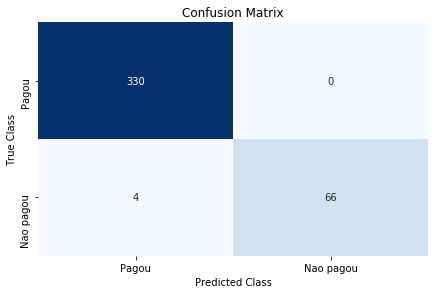

In [64]:
dataframe = pd.DataFrame(matrix, index=['Pagou','Nao pagou'], columns=['Pagou','Nao pagou'])
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='g')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()